In [ ]:
cd /content/drive/My Drive

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import AgglomerativeClustering 

In [5]:
data = pd.read_csv( 'CRM-Project-Noorbehbahani-Dataset.csv' )

In [6]:
data = data.fillna(0)

In [7]:
data.drop('id', inplace=True, axis=1)

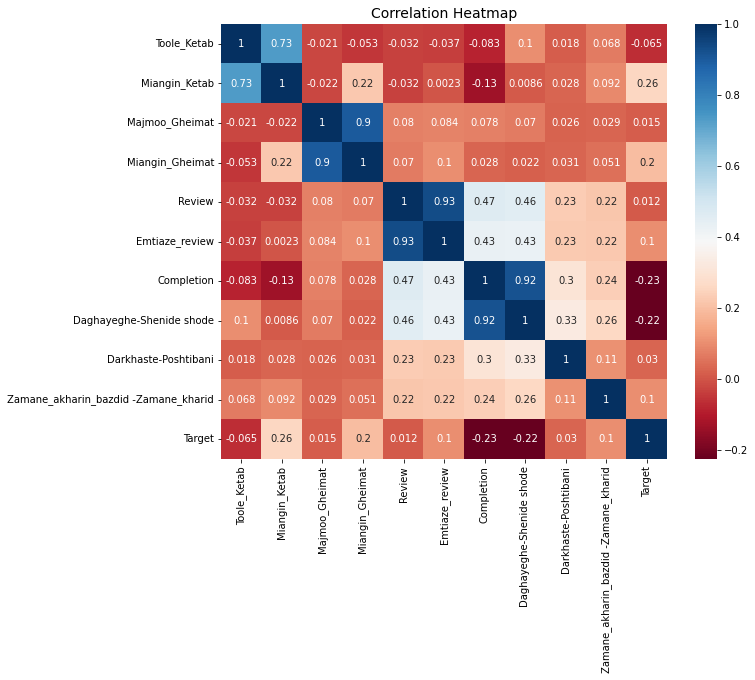

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [9]:
data.drop('Emtiaze_review', inplace=True, axis=1)
data.drop('Miangin_Gheimat', inplace=True, axis=1)
data.drop('Miangin_Ketab', inplace=True, axis=1)
data.drop('Daghayeghe-Shenide shode', inplace=True, axis=1)

In [10]:
df = data.copy()

In [11]:

scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)
data_scaled[0]

array([ 0.05694432,  2.56031917,  2.28491752,  3.58354763, 10.44134984,
        0.34085525, -0.43453904])

In [12]:
pca = PCA()
# fit PCA
pca.fit(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.26250693, 0.16068242, 0.15038996, 0.13967005, 0.1241834 ,
       0.10005548, 0.06251175])

In [13]:

pca2 = PCA(n_components=2, svd_solver='full')
pca2.fit(data_scaled)
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)

(14084, 2)


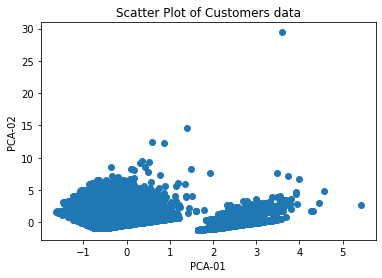

In [14]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [15]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05) 

In [16]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, optics_model)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('optics', OPTICS(min_cluster_size=0.05, min_samples=10))])

In [17]:
# return a label for each data point based on their cluster
labels = model_fit.fit_predict(df)
df['Clusters'] = labels

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [18]:
# Number of data points for each feature in each cluster
df.groupby('Clusters').count()

,Toole_Ketab,Majmoo_Gheimat,Review,Completion,Darkhaste-Poshtibani,Zamane_akharin_bazdid -Zamane_kharid,Target
Clusters,,,,,,,
-1,10048,10048,10048,10048,10048,10048,10048
0,1191,1191,1191,1191,1191,1191,1191
1,916,916,916,916,916,916,916
2,798,798,798,798,798,798,798
3,1131,1131,1131,1131,1131,1131,1131


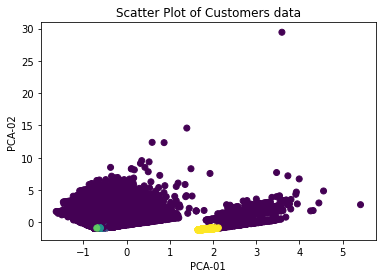

In [19]:

xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs,c=labels)
plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

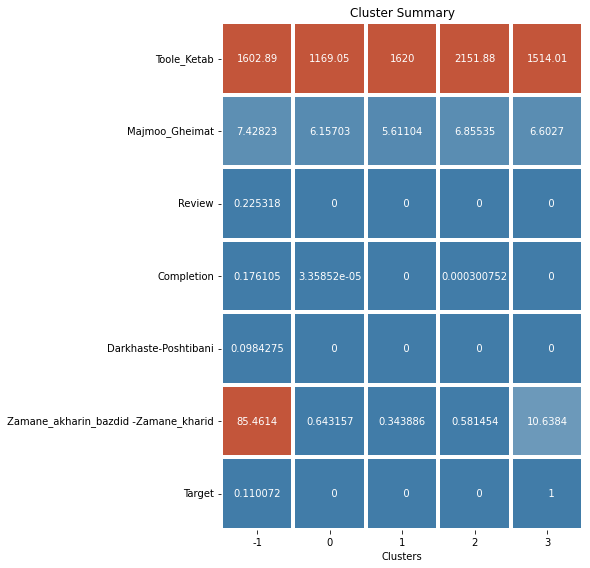

In [23]:
cluster_heatmap_df = df.groupby(['Clusters'])[['Toole_Ketab','Majmoo_Gheimat','Review', 'Completion', 'Darkhaste-Poshtibani', 'Zamane_akharin_bazdid -Zamane_kharid', 'Target']].mean()
heatcmap = sns.diverging_palette(240, 20, as_cmap=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    cbar=False, 
    annot=True,
    fmt='4g',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()